<a href="https://colab.research.google.com/github/Praveengovianalytics/-Lending_Club_EDA_Common/blob/main/01_Lending_Club_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Exploratory Data Analysis

## Index  :- 

  1. Understand the data & classify its attributes
  2. DataQuality Check 
  3. Profile the data and note Important Observation
  4. Data Cleaning 
  5. Dependent Variable Analysis 
  6. Univariate Analysis
  7. Bivariate Analysis
  6. Analysing Catagorical Variables
  7. Summary & Keypoints for Data Engineering & Modeling

In [2]:
!pip install -q klib
!pip install -q pandas_profiling
!pip install -q sweetviz

     |████████████████████████████████| 22.3 MB 5.7 MB/s 
     |████████████████████████████████| 15.1 MB 419 kB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 


In [95]:
import pandas as pd
import numpy as np 
import klib
import pandas_profiling
import seaborn as sns
import sweetviz as sv
import datetime
# Data Visualisation libraries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
!ls "/content/gdrive/My Drive/Colab Notebooks/IIIB-ML-AI/02_Statistics/02_Lending_Club_Case_Study/04_Lending_club_Case_Study/Data/"

Data_Dictionary.xlsx  loan.csv


In [28]:
DATA_PATH="/content/gdrive/My Drive/Colab Notebooks/IIIB-ML-AI/02_Statistics/02_Lending_Club_Case_Study/04_Lending_club_Case_Study/Data/"

In [29]:
df_dict_loan_stat = pd.read_excel(DATA_PATH+'Data_Dictionary.xlsx',sheet_name='LoanStats')
df_dict_rej_stat = pd.read_excel(DATA_PATH+'Data_Dictionary.xlsx',sheet_name='RejectStats')
df = pd.read_csv(DATA_PATH+'loan.csv', low_memory=False)

In [30]:
print( "Total Unique Customers accepted for Loan :- ",len(df['member_id'].unique()))

Total Unique Customers accepted for Loan :-  39717


In [31]:
pd.options.display.max_columns = None
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [32]:
len(df.columns)

111

In [13]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Let see how the missing data in dataset before Preprocessing

GridSpec(6, 6)

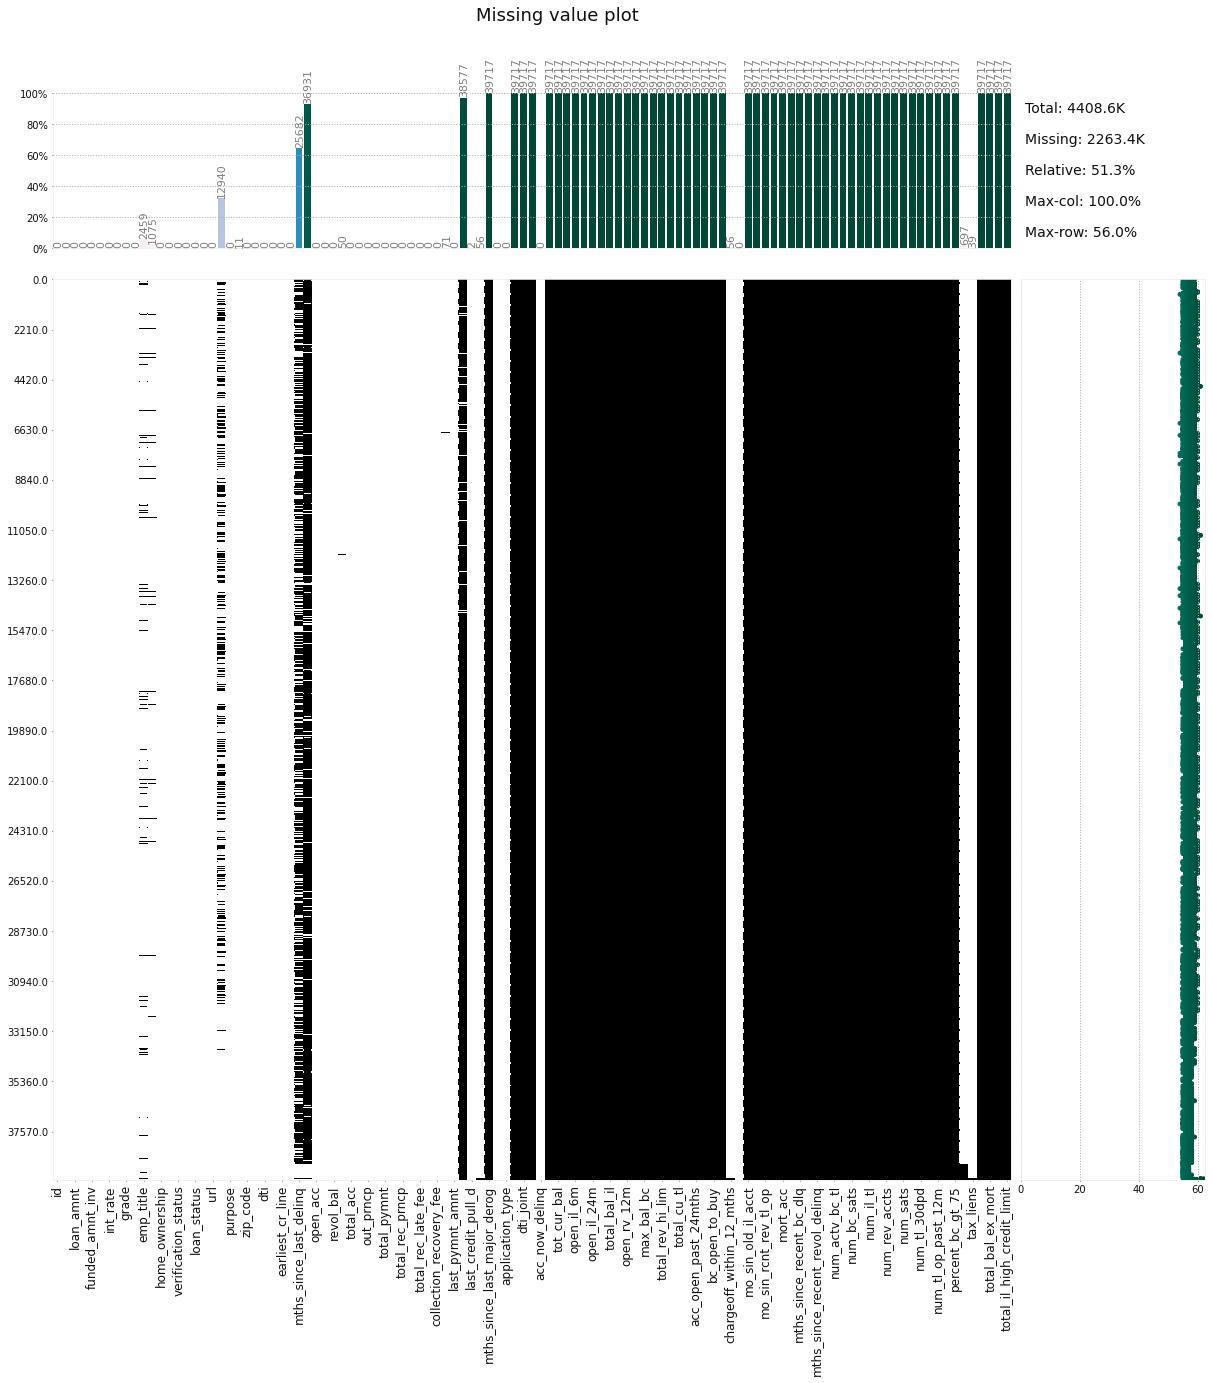

In [30]:
klib.missingval_plot(df)

### Get a list of columns that have more than 80% null values

In [33]:
na_values = df.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record            0.929854
next_pymnt_d                      0.971297
mths_since_last_major_derog       1.000000
annual_inc_joint                  1.000000
dti_joint                         1.000000
verification_status_joint         1.000000
tot_coll_amt                      1.000000
tot_cur_bal                       1.000000
open_acc_6m                       1.000000
open_il_6m                        1.000000
open_il_12m                       1.000000
open_il_24m                       1.000000
mths_since_rcnt_il                1.000000
total_bal_il                      1.000000
il_util                           1.000000
open_rv_12m                       1.000000
open_rv_24m                       1.000000
max_bal_bc                        1.000000
all_util                          1.000000
total_rev_hi_lim                  1.000000
inq_fi                            1.000000
total_cu_tl                       1.000000
inq_last_12m                      1.000000
acc_open_pa

### Drop columns with more than 80% null values

In [34]:
df.dropna(thresh = df.shape[0]*0.2, how = 'all', axis = 1, inplace = True)
na_values = df.isnull().mean()
na_values[na_values>0.8]

Series([], dtype: float64)

GridSpec(6, 6)

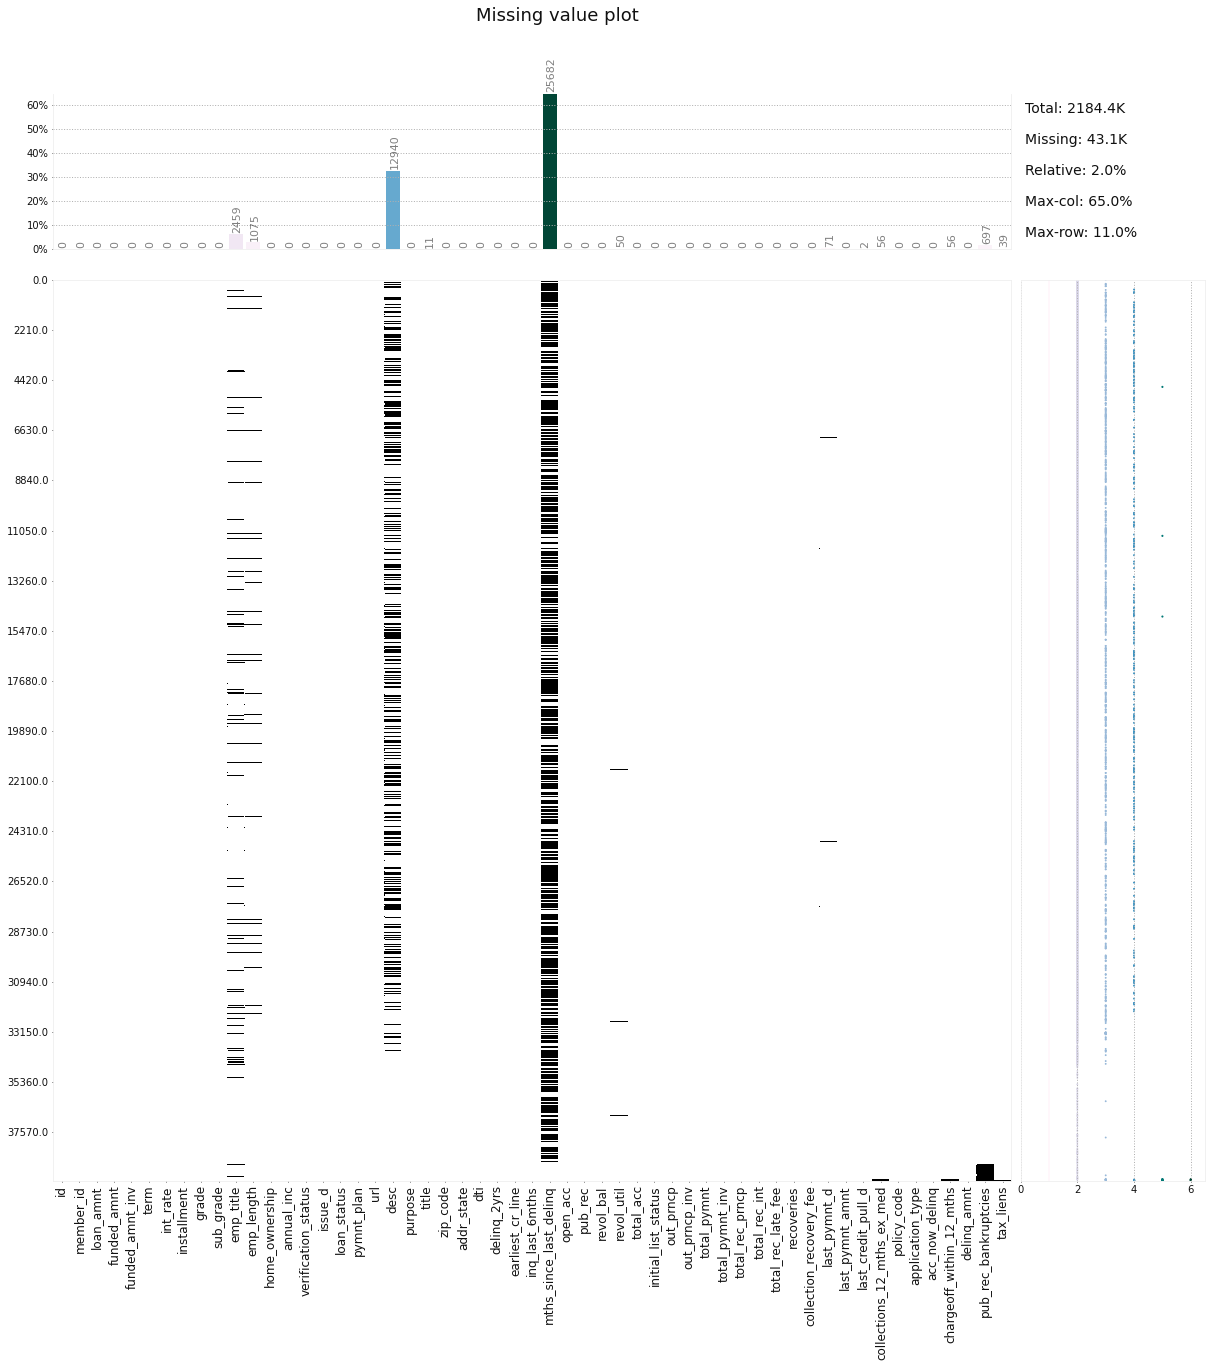

In [33]:
klib.missingval_plot(df)

#### Observation :- 
* Employment Title , URL has around 30% missing values
* Need to treat the mths_since_last_delinq field , It has 65% of missing values

In [27]:
len(df.columns)

55

In [35]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y').dt.date

In [39]:
def add_date_features(df,date_col):
  df[date_col+'_month'] = df[date_col].dt.month
  df[date_col+'_year'] = df[date_col].dt.year
  df[date_col+'_quarter'] = df[date_col].dt.quarter
  return df

In [108]:
df = add_date_features(df,'issue_d')

In [189]:
df['int_rate'] = df['int_rate'].replace('%','',regex=True).astype('float')

# 3.Profile the data and note Important Observation

In [77]:
def plot_pie(df,col):
  configure_plotly_browser_state()
  source = df[col].value_counts()
  fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
  fig.update_layout(title=col+' - Share')
  fig.show()
  return None

def plot_bar(df,col_x,col_y):
  configure_plotly_browser_state()
  source = df[col].value_counts()
  fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
  fig.update_layout(title=col+' - Share')
  fig.show()
  return None

In [78]:
plot_pie(df,'loan_status')

### Observation :- 

 * Fully Paid loans & On going loans contributes 86% of Loan Status 
 * Charged off loans contribute 14.2% of Loan Status 

In [73]:
df['loan_status_1'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off']), 1, 0)

In [47]:
plot_pie(df,'loan_status_1')

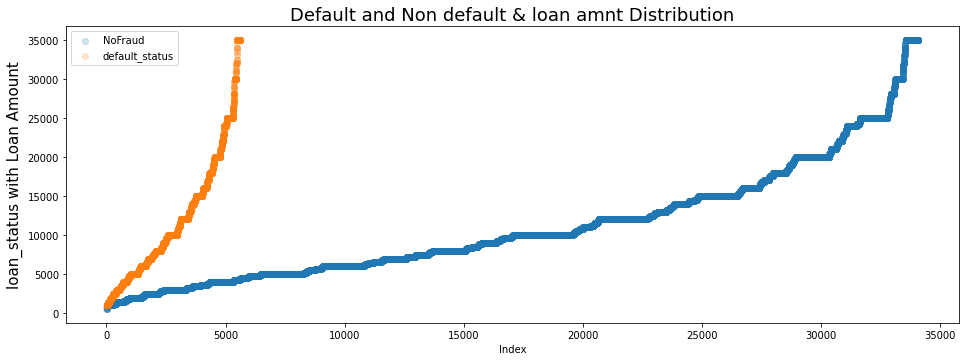

In [63]:
plt.figure(figsize=(16,12))
plt.subplot(212)
g4 = plt.scatter(range(df[df['loan_status_1'] == 0].shape[0]),
                 np.sort(df[df['loan_status_1'] == 0]['loan_amnt'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(df[df['loan_status_1'] == 1].shape[0]),
                 np.sort(df[df['loan_status_1'] == 1]['loan_amnt'].values), 
                 label='default_status', alpha=.2)
g4= plt.title("Default and Non default & loan amnt Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("loan_status with Loan Amount", fontsize=15)
g4 = plt.legend()

In [79]:
plot_pie(df,'verification_status')

In [80]:
plot_pie(df,'home_ownership')

In [120]:
df['emp_length'] = df['emp_length'].replace('year','',regex=True).replace('s','',regex=True).replace('<','',regex=True).replace("10\+",'10',regex=True).str.strip()

In [122]:
plot_pie(df,'emp_length')

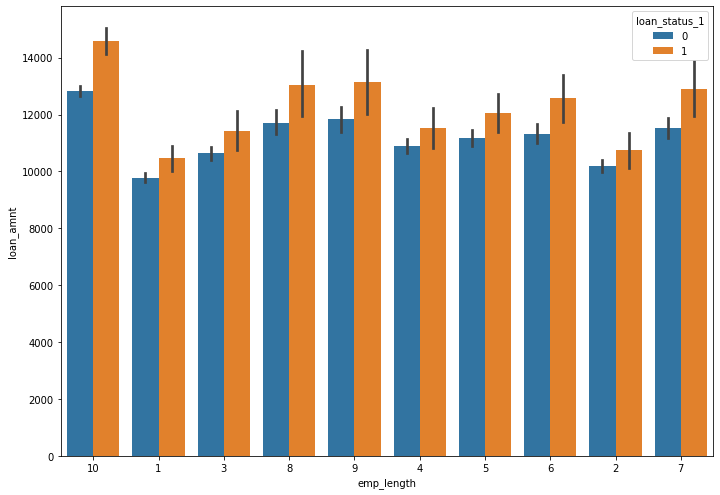

In [126]:
sns.barplot(df["emp_length"],df["loan_amnt"],hue=df['loan_status_1'])

In [141]:
configure_plotly_browser_state()
fig = px.box(df, x="emp_length", y="loan_amnt", points="all",color="loan_status_1")
fig.show()

In [64]:
def CalcOutliers(df_num): 

    print("===============================================")
    print("     OUTLIER PROFILE - ",df_num.name)
    print("==============================================")

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3
    df_num.median()

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]


    data_median = df_num.median()

    print('Mean                        : %d' % data_mean) # printing total number of values in lower cut of outliers
    print('Median                      : %d' % data_median) # printing total number of values in higher cut of outliers
    print('Standard Deviation          : %d' % data_std) # printing total number of values outliers of both sides
    print('Upper Cutoff                : %d' % abs(lower)) # printing total number of values outliers of both sides
    print('Lower Cutoff                : %d' % abs(upper)) # printing total number of values outliers of both sides
    print('Identified lowest outliers. : %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers   : %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations. : %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations    : %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers:", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    return

In [66]:
CalcOutliers(df['loan_amnt'])

     OUTLIER PROFILE -  loan_amnt
Mean                        : 11219
Median                      : 10000
Standard Deviation          : 7456
Upper Cutoff                : 11150
Lower Cutoff                : 33589
Identified lowest outliers. : 0
Identified upper outliers   : 719
Total outlier observations. : 719
Non-outlier observations    : 38998
Total percentual of Outliers: 1.8437


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


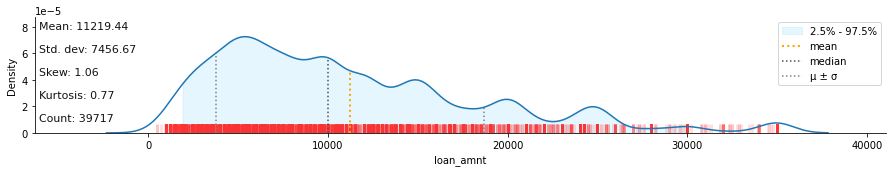

In [24]:
klib.dist_plot(df['loan_amnt'])

In [73]:
configure_plotly_browser_state()
source = df.groupby(['grade'])['loan_amnt'].sum()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Amount Share by Grade')
fig.show()

In [ ]:
configure_plotly_browser_state()
source = df.groupby(['grade'])['loan_amnt'].sum()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Amount Share by Grade')
fig.show()



grade -> B 

     OUTLIER PROFILE -  loan_amnt
Mean                        : 11119
Median                      : 10000
Standard Deviation          : 7220
Upper Cutoff                : 10542
Lower Cutoff                : 32780
Identified lowest outliers. : 0
Identified upper outliers   : 153
Total outlier observations. : 153
Non-outlier observations    : 11867
Total percentual of Outliers: 1.2893
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


grade -> C 

     OUTLIER PROFILE -  loan_amnt
Mean                        : 11004
Median                      : 9725
Standard Deviation          : 7295
Upper Cutoff                : 10881
Lower Cutoff                : 32891
Identified lowest outliers. : 0
Identified upper outliers   : 126
Total outlier observations. : 126
Non-outlier observations    : 7972
Total percentual of Outliers: 1.5805


grade -> A 

     OUTLIER PROFILE -  loan_amnt
Mean                       

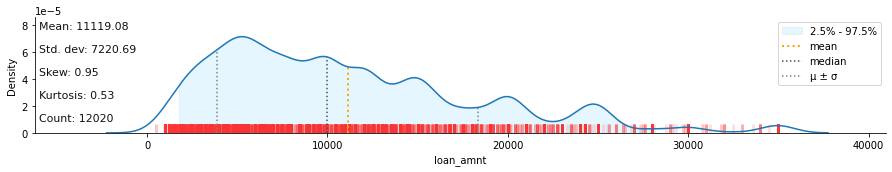

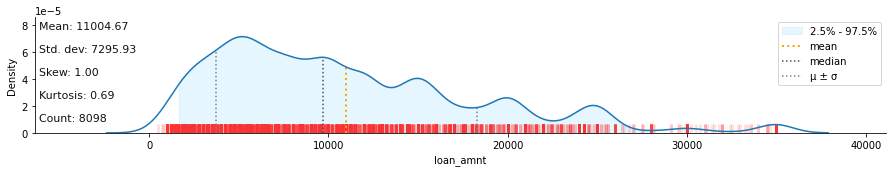

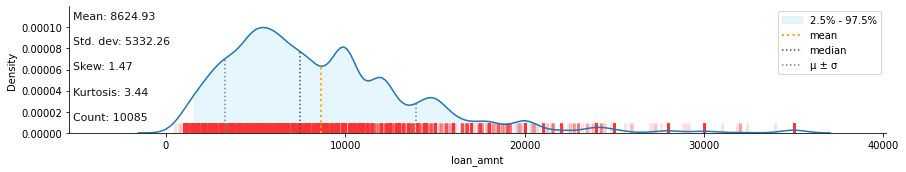

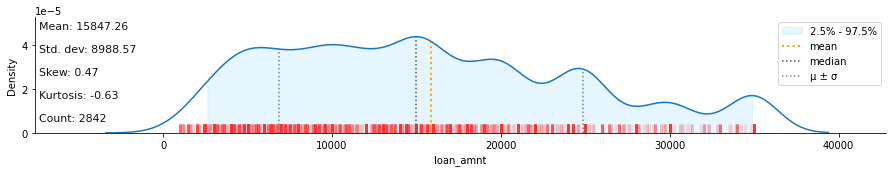

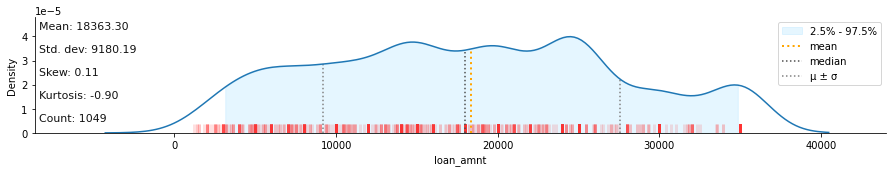

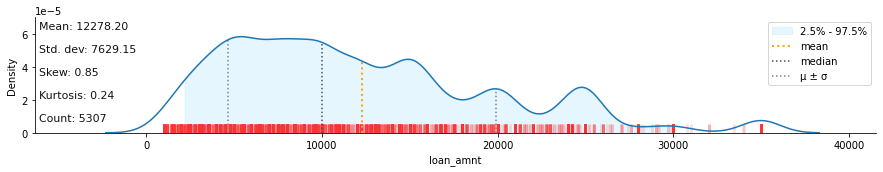

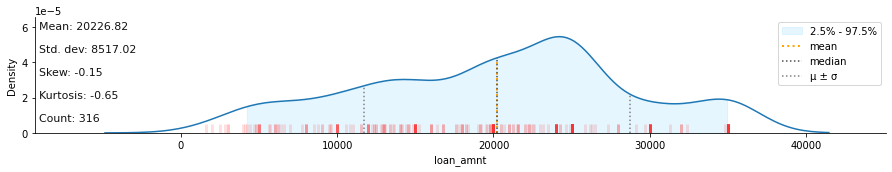

In [71]:
for grade in list(df['grade'].unique()):
  print("\n\ngrade ->",grade,'\n')
  CalcOutliers(df.loc[df['grade']==grade]['loan_amnt'])
  klib.dist_plot(df.loc[df['grade']==grade]['loan_amnt'])

GridSpec(6, 23)

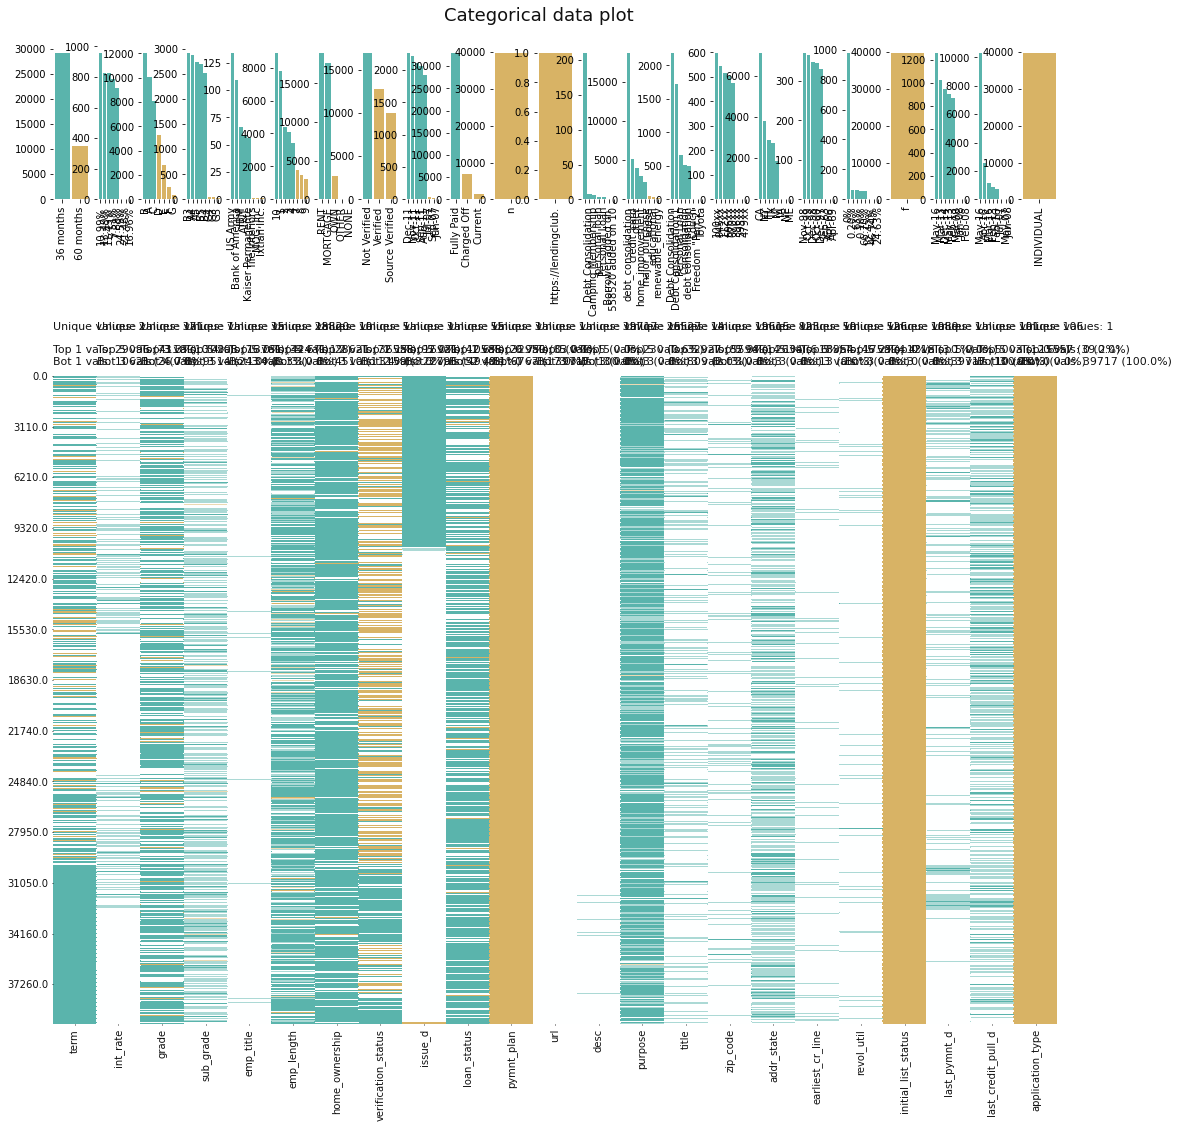

In [132]:
klib.cat_plot(df,top=5,)

# Loan Purpose Share

In [53]:
configure_plotly_browser_state()
source = df.purpose.value_counts().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Purpose Share')
fig.show()

There seems to be a slight difference in income level across grade, with one grade has a high density of income above $100,000. Perhaps it may not be beneficial to dive too deep into it, except having a brief look at the median income accross each grade. We do see that while other grades seem to have similar median incomes, grade A does stand out

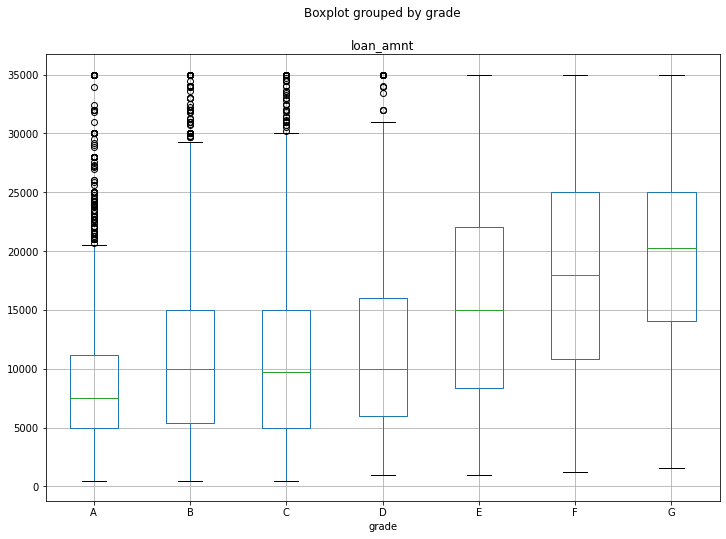

In [62]:
df.boxplot(by = 'grade', column = 'loan_amnt')

### Median of incomes in each grade

In [54]:
income_median = pd.pivot_table(df, values = 'annual_inc', index = 'grade', aggfunc = np.median)
income_median

annual_inc
grade            
A         57600.0
B         57989.5
C         56000.0
D         59000.0
E         65000.0
F         72000.0
G         80000.0

#7, Bivariate Analysis

In [163]:
loan_issue_smmry = df.groupby(['issue_d','grade']).agg({'loan_amnt':'sum'}).reset_index()

In [164]:
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry, x="issue_d", y="loan_amnt", color='grade',title='Loan Amount Issued Trend')
fig.show()

### Observation :- 

Less Loan amount sanctioned for Credit Grades F & G ,Where as More loan amount sanction for Credit Grades B, Grades A & Grades C 

In [165]:
loan_issue_smmry_term = df.groupby(['issue_d','term']).agg({'loan_amnt':'sum'}).reset_index()

In [169]:
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_term, x="issue_d", y="loan_amnt", color='term',title='Loan Amount Issued Trend')
fig.show()

### Observation :- 
As per the dataset , 60 Month Term loan started in 1-May-20210 where as 36 month term loans started in 1-July-2007 , From 1st Dec 2011 Total Loan amount for 60 term loan surpasses 36 months term loan 

In [170]:
loan_issue_smmry_term_home_ownership = df.groupby(['issue_d','home_ownership']).agg({'loan_amnt':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_term_home_ownership, x="issue_d", y="loan_amnt", color='home_ownership',title='Loan Amount Issued Trend - home_ownership')
fig.show()

In [ ]:
### 

In [172]:
loan_issue_smmry_loan_status_1 = df.groupby(['issue_d','loan_status_1']).agg({'loan_amnt':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_loan_status_1, x="issue_d", y="loan_amnt", color='loan_status_1',title='Loan Amount Issued Trend - Loan Status')
fig.show()

In [173]:
loan_issue_smmry_installment= df.groupby(['issue_d','loan_status_1']).agg({'installment':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_installment, x="issue_d", y="installment", color='loan_status_1',title='Loan installment Issued Trend - Loan Status')
fig.show()

In [178]:
loan_purpouse_cat = df.groupby(['purpose','loan_status_1']).agg({'loan_amnt':'sum'}).reset_index().sort_values(by='loan_amnt',ascending=False)
configure_plotly_browser_state()
fig = px.bar(loan_purpouse_cat, x="purpose", y="loan_amnt", color='loan_status_1',title='Loan Amount - Purpouse - Loan Status')
fig.show()

### Observation :- 

Customes borrows majorly for Debt consolidation ,followed by Credit card & Home Improvement 

In [ ]:
purpose

In [181]:
loan_issue_smmry_dti= df.groupby(['issue_d','loan_status_1']).agg({'dti':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_dti, x="issue_d", y="dti", color='loan_status_1',title=' DTI Date to Intrest Issued Trend - Loan Status')
fig.show()

In [182]:
home_ownership_cat = df.groupby(['home_ownership','loan_status_1']).agg({'loan_amnt':'sum'}).reset_index().sort_values(by='loan_amnt',ascending=False)
configure_plotly_browser_state()
fig = px.bar(home_ownership_cat, x="home_ownership", y="loan_amnt", color='loan_status_1',title='Home Ownership - Loan Status')
fig.show()

### Observation :- 

Loan borrowers who is having Own House is proportionally less default then those housing is in Mortgage or Rent

In [186]:
loan_issue_smmry_loan_status= df.groupby(['issue_d','loan_status']).agg({'loan_amnt':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_loan_status, x="issue_d", y="loan_amnt", color='loan_status',title='Loan Issued Trend - Loan Status')
fig.show()

In [187]:
loan_issue_smmry_annual_inc= df.groupby(['issue_d','loan_status']).agg({'annual_inc':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_annual_inc, x="issue_d", y="annual_inc", color='loan_status',title='Loan Issued Trend - Annual_inc & Loan Status')
fig.show()

#### Observation :- 
On Going loans data is captured in the dataset from 1st March 2011, For Modeling we can remove the On Going loans data

In [191]:

loan_issue_smmry_int_rate= df.groupby(['issue_d','loan_status_1']).agg({'int_rate':'median'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_int_rate, x="issue_d", y="int_rate", color='loan_status_1',title='Loan Issued Trend - Intrest Rate & Loan Status')
fig.show()

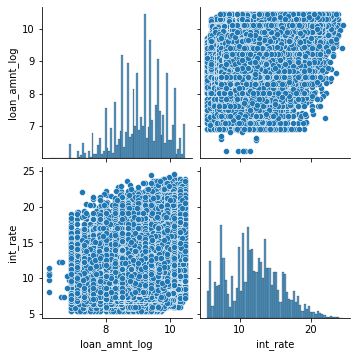

In [197]:
df['loan_amnt_log'] = np.log1p(df['loan_amnt'])
sns.pairplot(df[['loan_amnt_log','int_rate']])

In [201]:
inq_last_6mths_cat = df.groupby(['inq_last_6mths','loan_status_1']).agg({'loan_amnt':'sum'}).reset_index().sort_values(by='loan_amnt',ascending=False)
configure_plotly_browser_state()
fig = px.bar(inq_last_6mths_cat, x="inq_last_6mths", y="loan_amnt", color='loan_status_1',title='inq_last_6mths - Loan Status')
fig.show()

In [199]:
inq_last_6mths_cat = df.groupby(['inq_last_6mths','loan_status_1']).agg({'loan_amnt_log':'mean'}).reset_index().sort_values(by='loan_amnt_log',ascending=False)
configure_plotly_browser_state()
fig = px.bar(inq_last_6mths_cat, x="inq_last_6mths", y="loan_amnt_log", color='loan_status_1',title='inq_last_6mths - Loan Status')
fig.show()

In [203]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status_1', 'issue_d_month',
       

In [205]:
loan_issue_smmry_total_pymnt=df.groupby(['issue_d','loan_status_1']).agg({'total_pymnt':'sum'}).reset_index()
configure_plotly_browser_state()
fig = px.line(loan_issue_smmry_total_pymnt, x="issue_d", y="total_pymnt", color='loan_status_1',title='Loan Issued Trend - total_pymnt & Loan Status')
fig.show()

In [208]:
total_acc_cat = df.groupby(['total_acc','loan_status_1']).agg({'loan_amnt':'sum'}).reset_index().sort_values(by='total_acc',ascending=False)
configure_plotly_browser_state()
fig = px.bar(total_acc_cat, x="total_acc", y="loan_amnt", color='loan_status_1',title='total_acc_cat - Loan Status')
fig.show()

In [53]:
def loan_term_converter(df, column,string_to_replace):
    df[column] = pd.to_numeric(df[column].str.replace(string_to_replace, ''))

In [54]:
loan_term_converter(df, 'term',' months')

In [55]:
loan_term_converter(df, 'revol_util','%')

In [61]:
loan_term_converter(df, 'int_rate','%')

In [62]:
df['revol_util']=df['revol_util'].astype('float')
df['int_rate']=df['int_rate'].astype('float')

### Feature Engineeting

In [78]:
cols_to_ignore = [ 'url',
 'desc',
 'purpose',
 'title',
 'zip_code','earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d','loan_status']

In [79]:
col_cat = [x for x in list(df.select_dtypes(include = 'object').columns) if x not in cols_to_ignore]

In [80]:
x_cat = df[col_cat]
y = df['loan_status_1']

In [81]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in x_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, x_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

Feature       p-value
0                grade  0.000000e+00
1            sub_grade  0.000000e+00
2  verification_status  0.000000e+00
3              issue_d  0.000000e+00
4           addr_state  0.000000e+00
5            emp_title  6.000000e-10
6       home_ownership  1.398680e-05
7           emp_length  8.765956e-02
8           pymnt_plan  1.000000e+00
9     application_type  1.000000e+00

In [ ]:
chi2_result

#### Observation :- Keep Only Top 5 Catagorical Variable

##  ANOVA F-Statistic for numerical features

In [88]:
x_num.isnull().sum()/x_num.shape[0]

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.646625
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.001259
total_acc                     0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt          

In [48]:
df.select_dtypes(include ='number').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [97]:
cols_to_ignore_num = [ 'id', 'member_id','mths_since_last_delinq','loan_status_1']

In [98]:
col_num = [x for x in list(df.select_dtypes(include = 'number').columns) if x not in cols_to_ignore_num]

In [99]:
x_num = df[col_num]

In [100]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
x_num.fillna(x_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(x_num, y)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': x_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

Numerical_Feature      F-Score      p values
0                   recoveries  5201.403333  0.000000e+00
1              total_rec_prncp  5021.074098  0.000000e+00
2                  total_pymnt  2402.653009  0.000000e+00
3              total_pymnt_inv  2347.320668  0.000000e+00
4              last_pymnt_amnt  1923.847834  0.000000e+00
5      collection_recovery_fee  1749.243053  0.000000e+00
6                     int_rate  1590.914385  0.000000e+00
7           total_rec_late_fee  1087.007912  0.000000e+00
8                         term   865.467584  0.000000e+00
9                   revol_util   372.809898  0.000000e+00
10              inq_last_6mths   205.320998  0.000000e+00
11                   out_prncp   122.603867  0.000000e+00
12               out_prncp_inv   122.343774  0.000000e+00
13                     pub_rec   103.081141  0.000000e+00
14                   loan_amnt    92.547622  0.000000e+00
15        pub_rec_bankruptcies    87.724137  0.000000e+00
16                 funded_amnt    82.551366  0.000000e+00
17                         dti    69.184514  0.000000e+00
18                  annual_inc    69.053410  0.000000e+00
19             funded_amnt_inv    28.164467  1.120000e-07
20                   total_acc    22.061974  2.648700e-06
21                 installment    20.274951  6.726400e-06
22                 delinq_2yrs    15.740688  7.277210e-05
23               total_rec_int     4.616078  3.167961e-02
24                    open_acc     4.582970  3.229728e-02
25                   revol_bal     0.450733  5.019911e-01
26  collections_12_mths_ex_med          NaN           NaN
27                 policy_code          NaN           NaN
28              acc_now_delinq          NaN           NaN
29    chargeoff_within_12_mths          NaN           NaN
30                 delinq_amnt          NaN           NaN
31                   tax_liens          NaN           NaN

In [105]:
col_num+['loan_status_1']

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'loan_status_1']

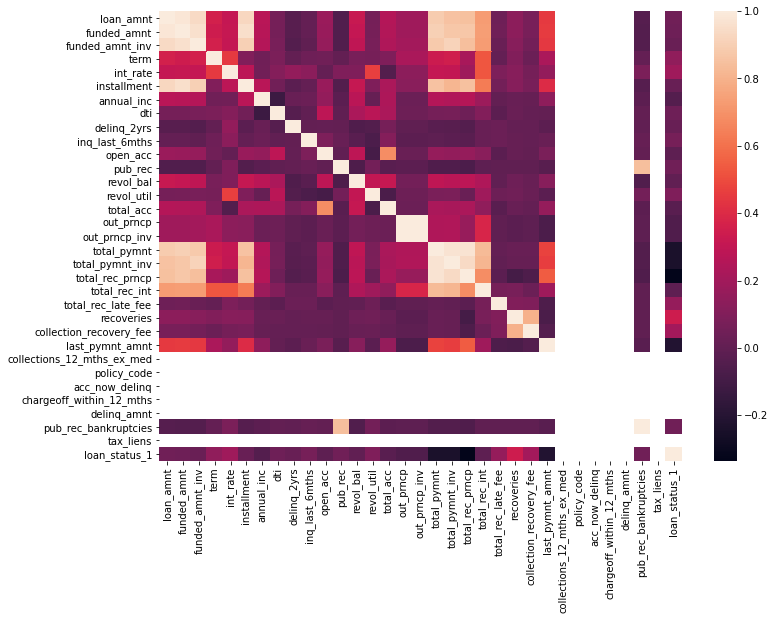

In [106]:
sns.heatmap(df[col_num+['loan_status_1']].corr())